#### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#### Importing The Dataset

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df = df.rename(columns = {"N": "NITROGEN_CONTENT",
                                  "P":"PHOSPHOROUS_CONTENT",
                                  "K": "POTASSIUM_CONTENT", "temperature": "TEMPERATURE",
                                   "humidity": "HUMIDITY",
                                   "ph": "PH_SOIL",
                                   "rainfall": "RAINFALL",
                                   "label": "LABEL"})
x = df.iloc[:, :-1].values # matrix of features
y = df.iloc[:, -1].values # matrix of output
df

,NITROGEN_CONTENT,PHOSPHOROUS_CONTENT,POTASSIUM_CONTENT,TEMPERATURE,HUMIDITY,PH_SOIL,RAINFALL,LABEL
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### Description of Dataset 

In [3]:
df['LABEL'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NITROGEN_CONTENT,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
PHOSPHOROUS_CONTENT,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
POTASSIUM_CONTENT,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
TEMPERATURE,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
HUMIDITY,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
PH_SOIL,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
RAINFALL,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


<AxesSubplot:>

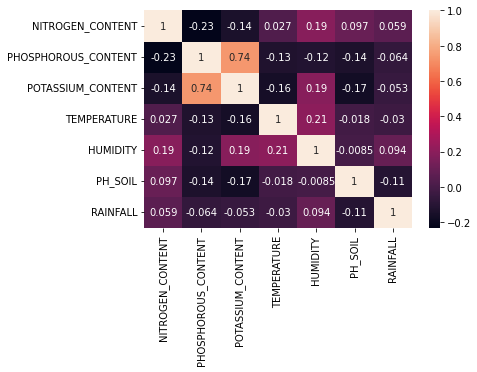

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NITROGEN_CONTENT     2200 non-null   int64  
 1   PHOSPHOROUS_CONTENT  2200 non-null   int64  
 2   POTASSIUM_CONTENT    2200 non-null   int64  
 3   TEMPERATURE          2200 non-null   float64
 4   HUMIDITY             2200 non-null   float64
 5   PH_SOIL              2200 non-null   float64
 6   RAINFALL             2200 non-null   float64
 7   LABEL                2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Encoding The Dependent Variable

In [7]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['LABEL'] = le.fit_transform(df['LABEL'])
# df.head()

In [8]:
df['LABEL'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: LABEL, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2, random_state= 0)

#### Standardization of features

In [10]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[-0.64463185  2.00512125  2.96466347 ...  0.86301256 -0.4785779
   0.23692732]
 [ 0.81334894 -0.52889759 -0.2035231  ...  0.7381018  -0.18240887
   0.84590226]
 [ 1.05634574  0.1649409  -0.26219322 ...  0.82317986  0.82415091
   1.29625399]
 ...
 [-0.42863469  0.31577536 -0.65332736 ... -0.36751109  0.03555503
  -0.61777686]
 [-0.32063612  0.34594225 -0.4968737  ... -0.11470255  1.59909782
  -1.13413007]
 [-0.99562722 -0.95123406 -0.7706676  ...  0.880759    0.09231399
   0.1609325 ]]


#### LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_train)
accuracy_score(lr_y_pred, y_train)

0.975

#### LogisticRegression (cross_val_score)

In [12]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.16 %
Standard Deviation: 1.19 %


#### KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_train)
accuracy_score(knn_y_pred, y_train)

0.9835227272727273

#### KNeighborsClassifier (cross_val_score)

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.22 %
Standard Deviation: 1.06 %


#### SupportVectorClassifier

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0)
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_train)
accuracy_score(svc_y_pred, y_train)

0.9875

#### SupportVectorClassifier (cross_val_score)

In [16]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.41 %
Standard Deviation: 1.13 %


#### GaussianNB

In [17]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train)
nbc_y_pred = nbc.predict(x_train)
accuracy_score(nbc_y_pred, y_train) 

0.9954545454545455

#### GaussianNB (cross_val_score)

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nbc, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.43 %
Standard Deviation: 0.51 %


#### DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=2)
dtc.fit(x_train, y_train)
dtc_y_pred = dtc.predict(x_train)
accuracy_score(dtc_y_pred, y_train)

0.18693181818181817

#### DecisionTreeClassifier (cross_val_score)

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 18.69 %
Standard Deviation: 0.40 %


#### RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(x_train, y_train)
rfc_y_pred  =rfc.predict(x_train)
accuracy_score(rfc_y_pred, y_train)

0.9994318181818181

#### RandomForestClassifier (cross_val_score)

In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.03 %
Standard Deviation: 0.62 %


#### TestPrediction

In [23]:
y_pred = rfc.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
accuracy_score(y_pred, y_test)

[['watermelon' 'watermelon']
 ['watermelon' 'watermelon']
 ['grapes' 'grapes']
 ['chickpea' 'chickpea']
 ['blackgram' 'blackgram']
 ['rice' 'rice']
 ['mothbeans' 'mothbeans']
 ['kidneybeans' 'kidneybeans']
 ['muskmelon' 'muskmelon']
 ['banana' 'banana']
 ['mothbeans' 'mothbeans']
 ['coffee' 'coffee']
 ['lentil' 'lentil']
 ['mungbean' 'mungbean']
 ['mango' 'mango']
 ['apple' 'apple']
 ['coffee' 'coffee']
 ['lentil' 'lentil']
 ['coffee' 'coffee']
 ['mango' 'mango']
 ['coconut' 'coconut']
 ['blackgram' 'blackgram']
 ['kidneybeans' 'kidneybeans']
 ['jute' 'jute']
 ['cotton' 'cotton']
 ['coffee' 'coffee']
 ['lentil' 'lentil']
 ['orange' 'orange']
 ['mothbeans' 'mothbeans']
 ['kidneybeans' 'kidneybeans']
 ['pomegranate' 'pomegranate']
 ['rice' 'rice']
 ['maize' 'maize']
 ['muskmelon' 'muskmelon']
 ['coconut' 'coconut']
 ['cotton' 'cotton']
 ['mango' 'mango']
 ['mango' 'mango']
 ['watermelon' 'watermelon']
 ['blackgram' 'mothbeans']
 ['maize' 'maize']
 ['blackgram' 'blackgram']
 ['pigeonpeas'

0.9931818181818182

#### Pickle file of our model

In [24]:
import pickle 
pickle.dump(rfc, open("Trinitt.pkl", "wb"))